
### Introduction

Generating synthetic data is a crucial task in machine learning and data science to overcome the limitations of real-world datasets. One such limitation is the availability of sufficient, diverse, and balanced data for training models. In this scenario, we are working with the Pakistani Diabetes Dataset, which has 486 records for diabetic patients and 426 records for non-diabetic patients. The dataset contains 18 predictor attributes and one target attribute named 'Outcome', where 0 represents diabetes-negative cases and 1 represents diabetes-positive cases.

However, due to privacy concerns or limited access to the original data, using only this real-world dataset may not be feasible for everyone. Therefore, generating synthetic data that mimics the statistical properties of the original dataset can help researchers and practitioners develop and test machine learning models without directly accessing sensitive information.

In this notebook, we will use ctGAN (Conditional Generative Adversarial Network) to generate synthetic data based on the Pakistani Diabetes Dataset.

### About Dataset

Pakistani Diabetes Dataset was created by Dr Muhammad Shoaib and one of his research students, Aysha Qamar. The diabetic patients dataset (486 records) was collected from District Headquarter Teaching Hospital (DHQTH), Sahiwal, Pakistan under the supervision of Dr. Sarfaraz Ahmad Khan, senior registrar and diabetes mellitus specialist, DHQTH, Sahiwal. The non-diabetic patients dataset (426 records) was collected by hosting a medical camp at COMMSATS University Islamabad, Sahiwal Campus, Sahiwal, Pakistan under the supervision of Dr Sarfaraz Ahmad Khan and his team from DHQTH, Sahiwal.

This dataset contains 18 predictor attributes and one target attribute named 'Outcome' having 0 and 1 as diabetes-ve and diabetes+ve respectively.

In [115]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optimy
import numpy as np
from ctgan import CTGAN
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from pandas.plotting import scatter_matrix

In [116]:
df = pd.read_csv("Pakistani_Diabetes_Dataset.csv")
df

,age,gender,reguglacin,wt,BMI,wst,sys,dia,his,A1c,B.S.R,vision,Exr,dipsia,uria,Dur,neph,HDL,Outcome
0,60.0,1,0,76.0,29.90,41.0,130,90,0,8.90,278,0,30,1,0,5.0,0,60,1
1,57.0,1,1,64.0,24.30,39.0,120,80,1,8.50,165,0,20,1,1,20.0,0,42,1
2,58.0,0,0,73.0,25.20,34.0,140,90,0,5.65,130,1,20,0,0,0.0,0,54,0
3,27.0,0,1,60.0,22.01,30.0,110,70,0,5.00,95,0,15,0,0,0.0,0,57,0
4,56.0,1,0,70.0,25.80,43.0,125,90,0,8.30,139,1,40,1,0,5.0,1,53,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,22.0,0,0,54.0,17.08,40.0,143,85,1,5.00,165,0,15,0,0,0.0,0,54,0
908,32.0,0,1,52.0,18.50,28.0,138,95,1,4.70,87,0,0,0,0,0.0,0,54,0
909,22.0,0,0,78.0,26.14,32.0,183,88,1,4.50,100,0,0,1,0,0.0,0,40,1
910,18.0,1,1,53.0,20.05,33.0,195,93,1,4.70,74,1,15,0,0,0.0,0,46,0


In [117]:
df.rename(columns={
    "wt": "weight_kg",
    "BMI": "body_mass_index",
    "wst": "waist_inches",
    "sys": "systolic_bp",
    "dia": "diastolic_bp",
    "his": "familyhist_diabetes",
    "A1c": "hemoglobina1c",
    "B.S.R": "blood_sugar_random",
    "vision": "vision_impair",
    "Exr": "exercise_minutes",
    "dipsia": "polydipsia",
    "uria": "polyuria",
    "Dur": "diabetes_duration",
    "neph": "nephropathy",
    "HDL": "hdl_cholesterol",
    "Outcome": "diabetes_outcome",
},
inplace=True)

---
 Renaming Features for Better Readability
---

Previously, the feature names in our dataset were not very descriptive and made little sense. Based on best knowledge and common understanding of medical terms, we have renamed these features to make them more readable. Here are the new names along with a brief explanation:

- **weight_kg**: Weight of the individual measured in kilograms.
- **body_mass_index**: Body Mass Index (BMI) calculated from weight and height.
- **waist_inches**: Waist circumference measured in inches.
- **systolic_bp**: Systolic blood pressure, the upper number in a blood pressure reading.
- **diastolic_bp**: Diastolic blood pressure, the lower number in a blood pressure reading.
- **familyhist_diabetes**: Family history of diabetes (yes/no).
- **hemoglobina1c**: Hemoglobin A1C level, an indicator of blood sugar control over time.
- **blood_sugar_random**: Random blood glucose level measured without fasting.
- **vision_impair**: Vision impairment or loss (yes/no).
- **exercise_minutes**: Number of minutes spent exercising per week.
- **polydipsia**: Excessive thirst experienced by the individual.
- **polyuria**: Frequent urination experienced by the individual.
- **diabetes_duration**: Duration of diabetes diagnosis in years.
- **nephropathy**: Kidney disease related to diabetes.
- **hdl_cholesterol**: HDL (High-Density Lipoprotein) cholesterol level, often called "good" cholesterol.
- **diabetes_outcome**: Outcome or classification related to diabetes.

These new names should provide a clearer understanding of the data's context and help in better analysis.

In [112]:

print("Number of dublicates:", df.duplicated().sum())
print(df.isnull().sum())


Number of dublicates: 0
age                    0
gender                 0
reguglacin             0
weight_kg              0
body_mass_index        0
waist_inches           0
systolic_bp            0
diastolic_bp           0
familyhist_diabetes    0
hemoglobina1c          0
blood_sugar_random     0
vision_impair          0
exercise_minutes       0
polydipsia             0
polyuria               0
diabetes_duration      0
nephropathy            0
hdl_cholesterol        0
diabetes_outcome       0
dtype: int64


In [113]:
#Code to change the datatype of categorical variables to uint8
df["familyhist_diabetes"] = df["familyhist_diabetes"].astype("uint8")
df["vision_impair"] = df["vision_impair"].astype("uint8")
df["polydipsia"] = df["polydipsia"].astype("uint8")
df["polyuria"] = df["polyuria"].astype("uint8")
df["nephropathy"] = df["nephropathy"].astype("uint8")
df["diabetes_outcome"] = df["diabetes_outcome"].astype("uint8")
df["gender"] = df["gender"].astype("uint8")
df["reguglacin"] = df["reguglacin"].astype("uint8")

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  912 non-null    float64
 1   gender               912 non-null    int64  
 2   reguglacin           912 non-null    int64  
 3   weight_kg            912 non-null    float64
 4   body_mass_index      912 non-null    float64
 5   waist_inches         912 non-null    float64
 6   systolic_bp          912 non-null    int64  
 7   diastolic_bp         912 non-null    int64  
 8   familyhist_diabetes  912 non-null    int64  
 9   hemoglobina1c        912 non-null    float64
 10  blood_sugar_random   912 non-null    int64  
 11  vision_impair        912 non-null    int64  
 12  exercise_minutes     912 non-null    int64  
 13  polydipsia           912 non-null    int64  
 14  polyuria             912 non-null    int64  
 15  diabetes_duration    912 non-null    flo

In [119]:
df['body_mass_index'] = df['body_mass_index'].clip(upper=60)
df['waist_inches'] = df['waist_inches'].clip(upper=50)
df['systolic_bp'] = df['systolic_bp'].clip(upper=210  )

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'reguglacin'}>,
        <Axes: title={'center': 'weight_kg'}>],
       [<Axes: title={'center': 'body_mass_index'}>,
        <Axes: title={'center': 'waist_inches'}>,
        <Axes: title={'center': 'systolic_bp'}>,
        <Axes: title={'center': 'diastolic_bp'}>],
       [<Axes: title={'center': 'familyhist_diabetes'}>,
        <Axes: title={'center': 'hemoglobina1c'}>,
        <Axes: title={'center': 'blood_sugar_random'}>,
        <Axes: title={'center': 'vision_impair'}>],
       [<Axes: title={'center': 'exercise_minutes'}>,
        <Axes: title={'center': 'polydipsia'}>,
        <Axes: title={'center': 'polyuria'}>,
        <Axes: title={'center': 'diabetes_duration'}>],
       [<Axes: title={'center': 'nephropathy'}>,
        <Axes: title={'center': 'hdl_cholesterol'}>,
        <Axes: title={'center': 'diabetes_outcome'}>, <Axes: >]],
      dtype=object)

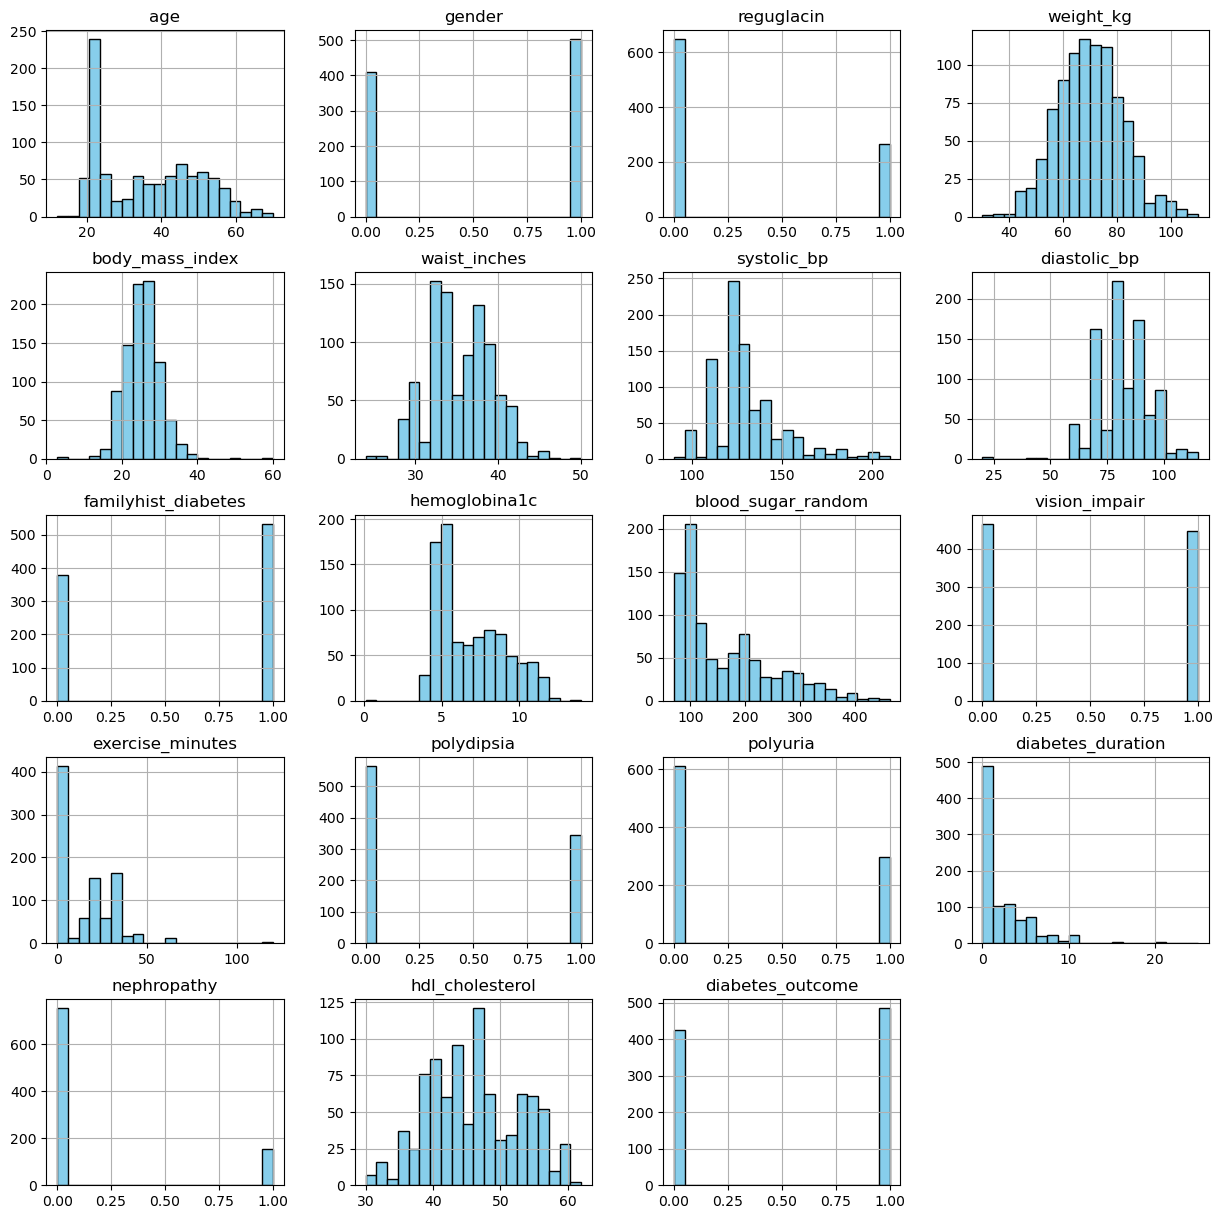

In [121]:
#Histogram for distribution of data
df.hist(figsize=(15,15), bins=20, color='skyblue', edgecolor='black')

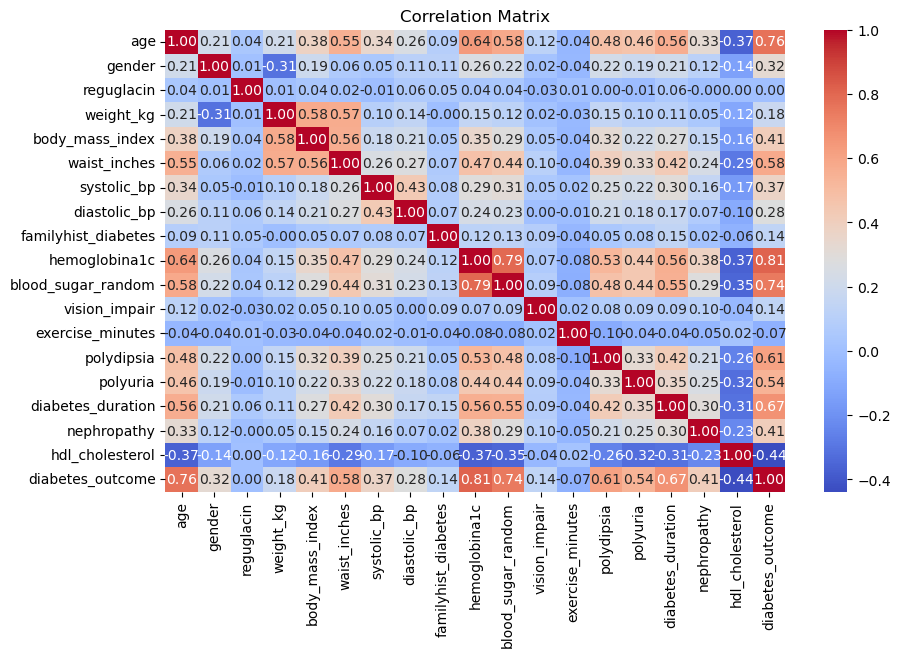

In [123]:
# 2. Plot the correlation matrix
plt.figure(figsize=(10, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.show()

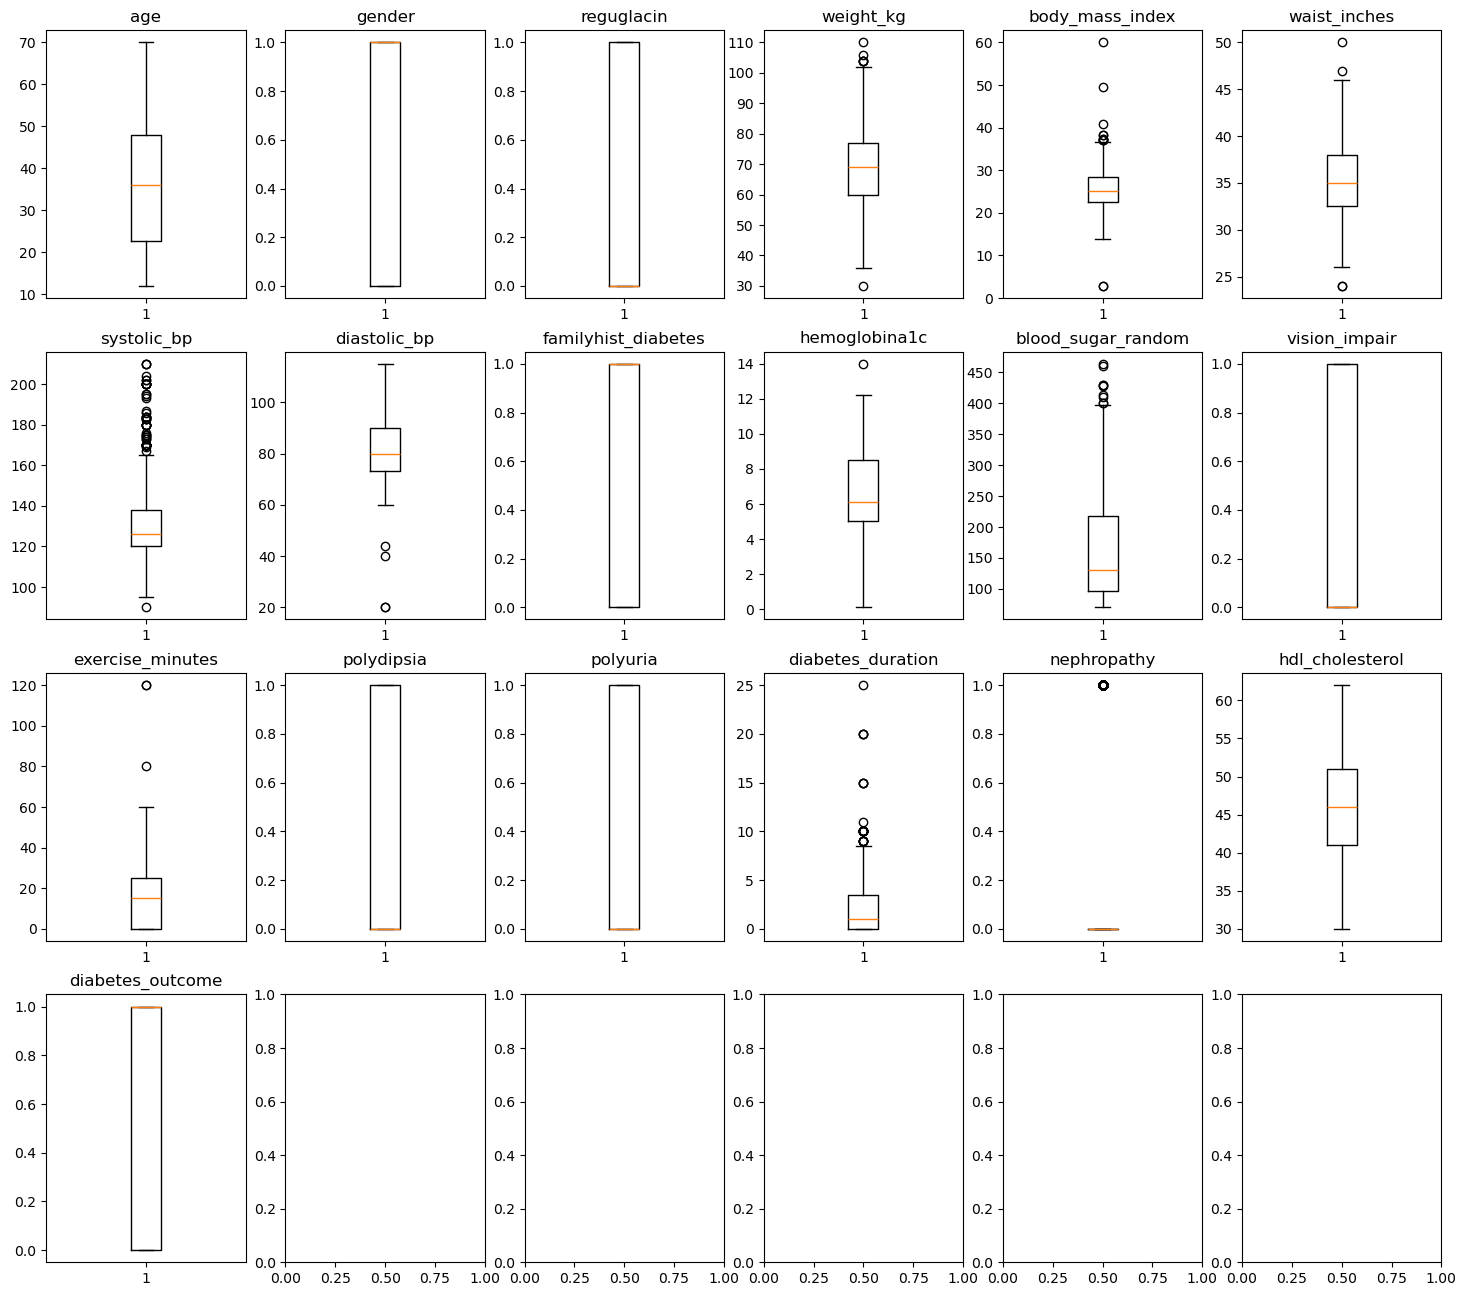

In [124]:
n_cols = 6
n_rows = 4
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*3, n_rows*4))  # Create grid

axes = axes.flatten()  # Flatten the 2D array into 1D
for i, column in enumerate(df.columns):  # Loop through all 18 columns
        axes[i].boxplot(df[column])  # Plot the boxplot on the ith subplot
        axes[i].set_title(f"{column}")
plt.show()

**Observations:**

In medical data, outliers are often considered rare and significant events. These outliers can be due to various reasons such as measurement errors, equipment malfunctions, or patient-specific factors. In the context of CTGAN (Conditional Generative Adversarial Network), we will not be performing any outlier cleaning during data generation. This decision is made to ensure that all potentially valuable and meaningful data points are retained for analysis."""


### Prepare For Training

In [125]:
print(torch.cuda.is_available())  # Should return True

True


In [126]:
print(torch.version.cuda)  # PyTorch's CUDA version
print(torch.cuda.is_available())  # Check if CUDA is available


12.4
True


In [141]:
ctgan = CTGAN(
    epochs=1000,  # Increase epochs
    batch_size=80,  # Experiment with batch size
    generator_dim=(256, 256, 256),  # Adjust generator architecture
    discriminator_dim=(512, 512, 512),  # Adjust discriminator architecture
    pac=1,  # Number of samples to group together when applying the discriminator
    verbose=True,
    cuda=True,
)

# Step 2: Train CTGAN on your dataset
ctgan.fit(df)

Gen. (-0.69) | Discrim. (-0.28): 100%|██████████| 1000/1000 [05:00<00:00,  3.32it/s]


- `epochs=1000`: This parameter sets the number of times the entire dataset will be passed through the model during training. Increasing this value can help improve the model's performance, but it also increases computational time.
- `batch_size=80`: The batch size determines how many samples are processed before the model’s internal parameters are updated. A higher batch size can lead to more stable gradient estimates and potentially faster convergence, but it requires more memory.
- `generator_dim=(256, 256, 256)`: This parameter defines the dimensions of the generator network's architecture in a three-dimensional setting (e.g., for volumetric data). Adjusting these values can impact the complexity and capacity of the generator model.
- `discriminator_dim=(512, 512, 512)`: Similarly, this parameter sets the discriminator network’s architecture dimensions. Higher values can allow the discriminator to capture more complex patterns but also increase computational demands.
- `pac=1`: The penalty accumulation coefficient (PAC) is a parameter used in some GAN architectures to regularize the training process by accumulating penalties across multiple generator passes before updating the discriminator. Setting it to 1 means no penalty accumulation.
- `verbose=True`: This flag enables detailed output during the training process, which can be useful for monitoring progress and debugging.
- `cuda=True`: This parameter specifies that the model should run on a CUDA-enabled GPU if available, accelerating the training process significantly.

These parameters can be adjusted based on specific requirements, computational resources, and the complexity of the task.

In [150]:
#Code to save the trained model
ctgan.save("CTGAN_model.pkl")


**Saving and Loading CTGAN Models with PKL Extension**

To save a trained CTGAN model, you can use the `save` method which saves the model to a `.pkl` file. This allows you to load the model later without needing to retrain it from scratch.

**Example of Saving and Loading a Model:**

```python
# Save the trained CTGAN model
ctgan.save("ctgan_model.pkl")

# Load the saved CTGAN model
loaded_ctgan = ctgan.load("ctgan_model.pkl")

# Use the loaded model to generate samples
generated_data = loaded_ctgan.sample(100)


In [142]:
samples0 = ctgan.sample(912)
df0 = pd.DataFrame(samples0,columns=df.columns)

In [143]:
df0.head(10)

,age,gender,reguglacin,weight_kg,body_mass_index,waist_inches,systolic_bp,diastolic_bp,familyhist_diabetes,hemoglobina1c,blood_sugar_random,vision_impair,exercise_minutes,polydipsia,polyuria,diabetes_duration,nephropathy,hdl_cholesterol,diabetes_outcome
0,53.712164,0,1,94.094597,33.757994,41.858592,127,78,1,8.691862,355,1,-1,1,1,8.910701,0,34,1
1,43.957867,1,0,84.692127,30.312935,40.908532,119,89,0,5.536223,126,1,20,0,0,5.966425,1,34,1
2,21.532153,0,0,75.951717,26.403128,34.102013,118,88,1,4.926375,90,0,27,0,0,-0.014249,0,53,0
3,45.890788,1,1,69.003002,29.961278,38.934945,119,79,1,8.451536,295,1,27,0,0,1.615106,0,51,1
4,54.361574,0,1,63.698284,25.348862,36.022081,110,69,1,7.418255,291,1,0,1,1,1.892965,1,53,1
5,40.389908,1,1,92.150151,32.446038,35.849991,156,112,0,6.217795,333,0,1,1,1,1.288136,0,38,1
6,22.983074,0,1,72.677450,21.736597,33.179909,128,85,1,4.379344,100,1,0,0,0,-0.245326,0,53,0
7,39.010577,0,1,81.694788,27.632706,36.193848,111,96,1,4.810705,104,1,29,0,1,-0.020275,0,35,0
8,39.140379,0,1,74.674222,25.421724,36.902352,139,80,0,4.766562,173,0,15,0,0,-0.163821,0,44,0
9,22.502756,0,0,66.760469,25.755265,30.153854,119,79,1,5.190572,117,0,0,0,1,-0.075398,0,41,0


In [144]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  912 non-null    float64
 1   gender               912 non-null    int64  
 2   reguglacin           912 non-null    int64  
 3   weight_kg            912 non-null    float64
 4   body_mass_index      912 non-null    float64
 5   waist_inches         912 non-null    float64
 6   systolic_bp          912 non-null    int64  
 7   diastolic_bp         912 non-null    int64  
 8   familyhist_diabetes  912 non-null    int64  
 9   hemoglobina1c        912 non-null    float64
 10  blood_sugar_random   912 non-null    int64  
 11  vision_impair        912 non-null    int64  
 12  exercise_minutes     912 non-null    int64  
 13  polydipsia           912 non-null    int64  
 14  polyuria             912 non-null    int64  
 15  diabetes_duration    912 non-null    flo

In [145]:
print(df0["nephropathy"].value_counts())
print(df0["diabetes_outcome"].value_counts())
print(df0["polyuria"].value_counts())
print(df0["polydipsia"].value_counts())
print(df0["reguglacin"].value_counts())

nephropathy
0    786
1    126
Name: count, dtype: int64
diabetes_outcome
1    492
0    420
Name: count, dtype: int64
polyuria
0    533
1    379
Name: count, dtype: int64
polydipsia
0    559
1    353
Name: count, dtype: int64
reguglacin
0    554
1    358
Name: count, dtype: int64


#### Correlation Matrix of Generated Data 

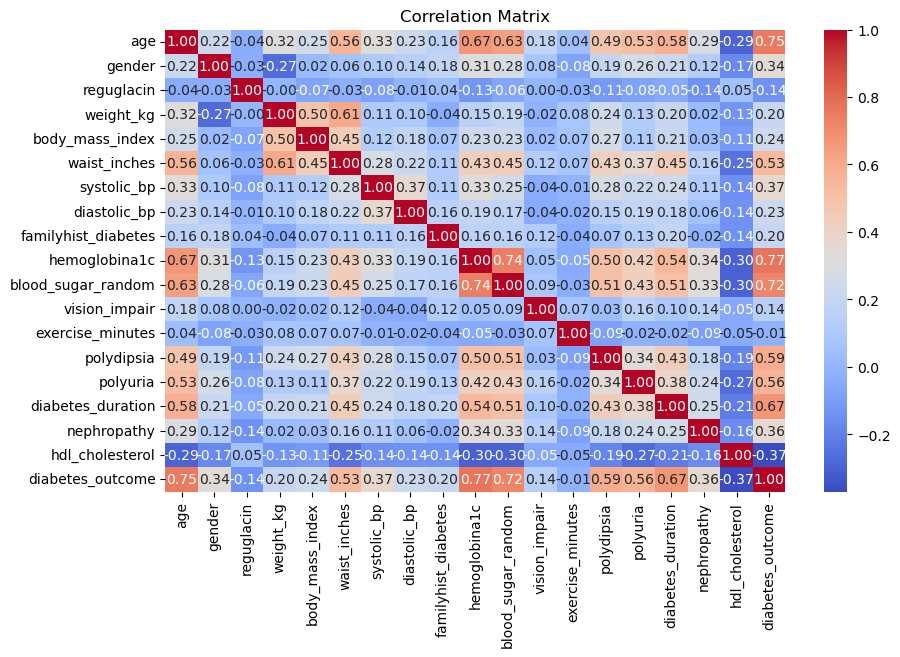

In [146]:
plt.figure(figsize=(10,6))
correlation_matrix = df0.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.show()

#### Correlation Matrix of Original Data

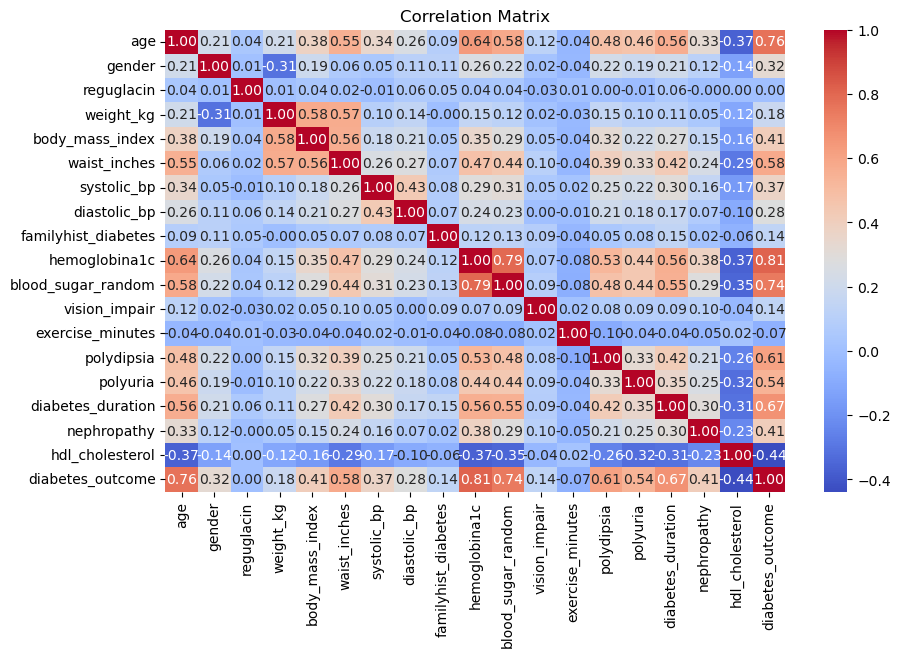

In [140]:
plt.figure(figsize=(10,6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.show()

#### General Evaluation 

In [147]:
# Compare summary statistics
summary_stats_original = df.describe()
summary_stats_synthetic = df0.describe()

print("\nSummary Statistics - Original Data:")
print(summary_stats_original)

print("\nSummary Statistics - Generated Data:")
print(summary_stats_synthetic)


Summary Statistics - Original Data:
              age      gender  reguglacin   weight_kg  body_mass_index  \
count  912.000000  912.000000  912.000000  912.000000       912.000000   
mean    36.318531    0.551535    0.289474   69.363158        25.437605   
std     13.521001    0.497610    0.453767   12.170322         4.660434   
min     12.000000    0.000000    0.000000   30.000000         2.840000   
25%     22.750000    0.000000    0.000000   60.000000        22.500000   
50%     36.000000    1.000000    0.000000   69.000000        25.235000   
75%     48.000000    1.000000    1.000000   77.000000        28.300000   
max     70.000000    1.000000    1.000000  110.000000        60.000000   

       waist_inches  systolic_bp  diastolic_bp  familyhist_diabetes  \
count    912.000000   912.000000    912.000000           912.000000   
mean      35.444627   129.593202     82.347588             0.585526   
std        3.782180    19.521613     11.831177             0.492901   
min       24

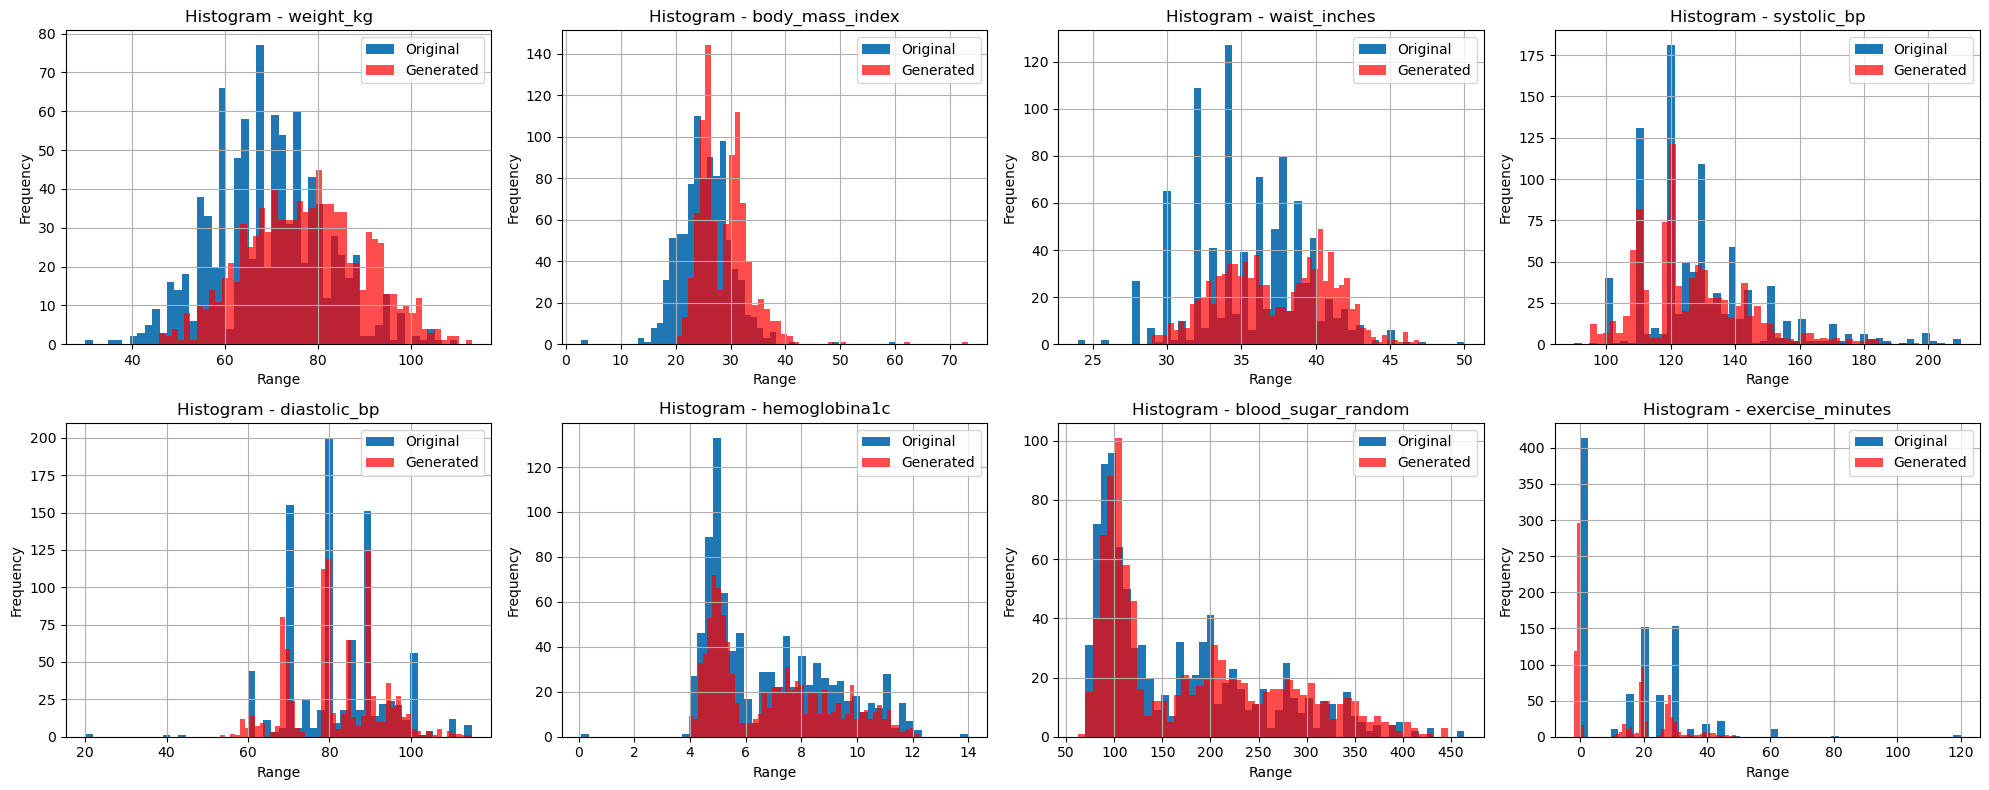

In [148]:
# Plot histograms for continuous variables
continuous_vars = ["weight_kg", "body_mass_index", "waist_inches", 
                   "systolic_bp", "diastolic_bp", "hemoglobina1c",
                   "blood_sugar_random", "exercise_minutes"]

plt.figure(figsize=(20, 8))
for i, var in enumerate(continuous_vars):
    plt.subplot(2, 4, i+1)
    df[var].hist(bins=50, label="Original")
    df0[var].hist(bins=50, alpha=0.7, color='red', label="Generated")
    plt.title(f"Histogram - {var}")
    plt.xlabel(f"Range")  # X-axis label
    plt.ylabel("Frequency")       # Y-axis label
    plt.legend()
plt.tight_layout()
plt.show()

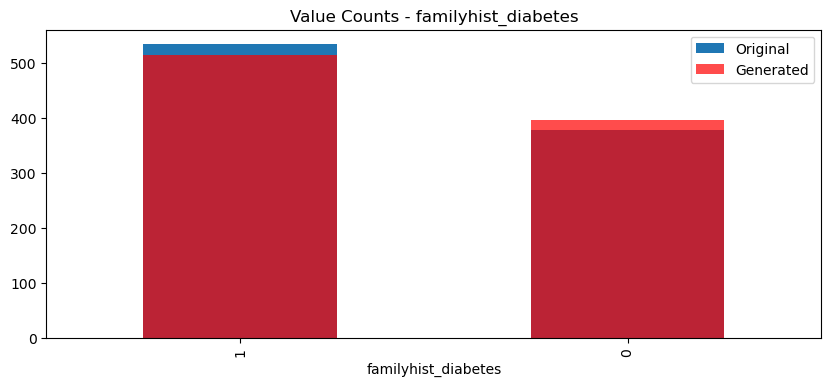

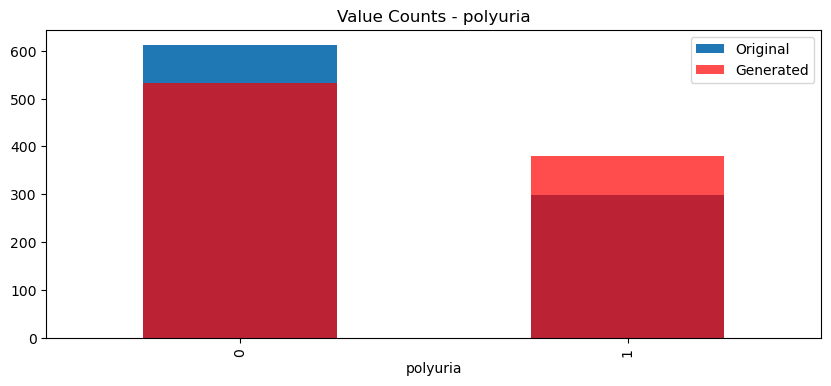

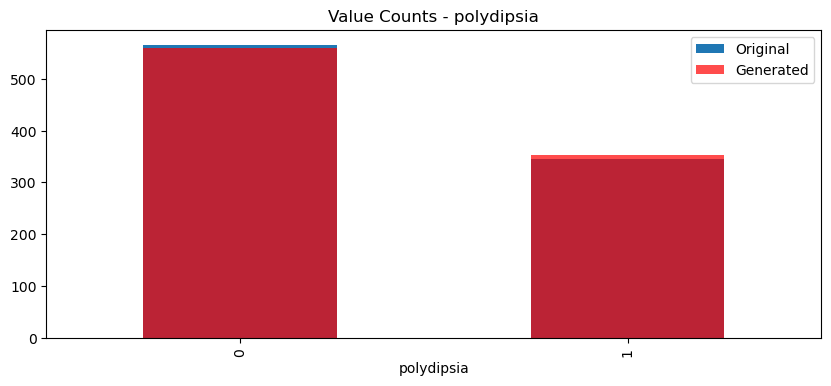

In [149]:
# Plot density plots for categorical variables
categorical_vars = ["familyhist_diabetes", "polyuria", "polydipsia"]

for var in categorical_vars:
    plt.figure(figsize=(10, 4))
    df[var].value_counts().plot(kind='bar', label="Original")
    df0[var].value_counts().plot(kind='bar', alpha=0.7, color='red', label="Generated")
    plt.title(f"Value Counts - {var}")
    plt.legend()
    plt.show()